In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
from folium.plugins import TimeSliderChoropleth
import folium
import seaborn as sns
import os
from branca.colormap import linear
from LocalFunctions import LocalFunctions
%matplotlib inline

In [2]:
df = pd.read_csv(r'..\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\10Mins-Consolidated.csv')

In [3]:
df

,timeInterval,SMSin,SMSout,callIn,callOut,internet
0,2013-11-01 00:00:00+01:00,26734.588499,20239.160967,10006.074483,11472.884509,642388.341222
1,2013-11-01 00:10:00+01:00,22397.285624,18320.202647,8708.312181,10175.953187,630005.148721
2,2013-11-01 00:20:00+01:00,19697.901226,17062.049977,7917.187587,9230.907121,619933.182580
3,2013-11-01 00:30:00+01:00,18936.405777,15817.010519,7207.441154,8540.273192,590963.037909
4,2013-11-01 00:40:00+01:00,17443.714163,14147.854631,6575.749383,8068.724248,577130.081608
...,...,...,...,...,...,...
8491,2013-12-29 23:10:00+01:00,18665.534787,16410.366199,5825.834924,6811.033889,420316.412425
8492,2013-12-29 23:20:00+01:00,19096.020040,16383.829826,5630.945627,7078.477042,415875.522092
8493,2013-12-29 23:30:00+01:00,18092.974550,16278.520802,5049.132017,6674.072650,406720.770992
8494,2013-12-29 23:40:00+01:00,16476.966298,14636.592342,4574.135645,5801.854979,399820.119282


In [4]:
df['timeInterval'] = pd.to_datetime(df['timeInterval'])
df=df.set_index(['timeInterval'])

In [5]:
df['day_name'] = df.index.day_name()

In [6]:
df

,SMSin,SMSout,callIn,callOut,internet,day_name
timeInterval,,,,,,
2013-11-01 00:00:00+01:00,26734.588499,20239.160967,10006.074483,11472.884509,642388.341222,Friday
2013-11-01 00:10:00+01:00,22397.285624,18320.202647,8708.312181,10175.953187,630005.148721,Friday
2013-11-01 00:20:00+01:00,19697.901226,17062.049977,7917.187587,9230.907121,619933.182580,Friday
2013-11-01 00:30:00+01:00,18936.405777,15817.010519,7207.441154,8540.273192,590963.037909,Friday
2013-11-01 00:40:00+01:00,17443.714163,14147.854631,6575.749383,8068.724248,577130.081608,Friday
...,...,...,...,...,...,...
2013-12-29 23:10:00+01:00,18665.534787,16410.366199,5825.834924,6811.033889,420316.412425,Sunday
2013-12-29 23:20:00+01:00,19096.020040,16383.829826,5630.945627,7078.477042,415875.522092,Sunday
2013-12-29 23:30:00+01:00,18092.974550,16278.520802,5049.132017,6674.072650,406720.770992,Sunday


In [7]:
dfDaily = df.resample('D').sum()
dfDaily['day_name'] = dfDaily.index.day_name()

C:\Users\kisha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


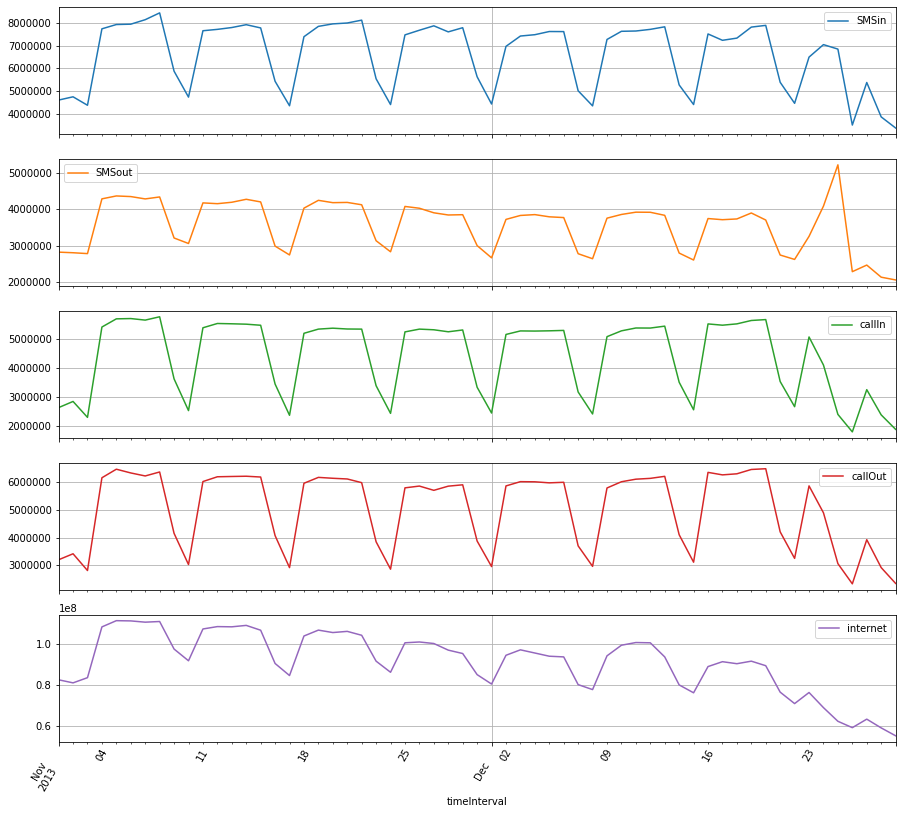

In [8]:
ax = dfDaily.plot(rot=60, subplots=True, figsize = (15,15), grid=True)

SMSin          AxesSubplot(0.125,0.125;0.133621x0.755)
SMSout      AxesSubplot(0.285345,0.125;0.133621x0.755)
callIn       AxesSubplot(0.44569,0.125;0.133621x0.755)
callOut     AxesSubplot(0.606034,0.125;0.133621x0.755)
internet    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

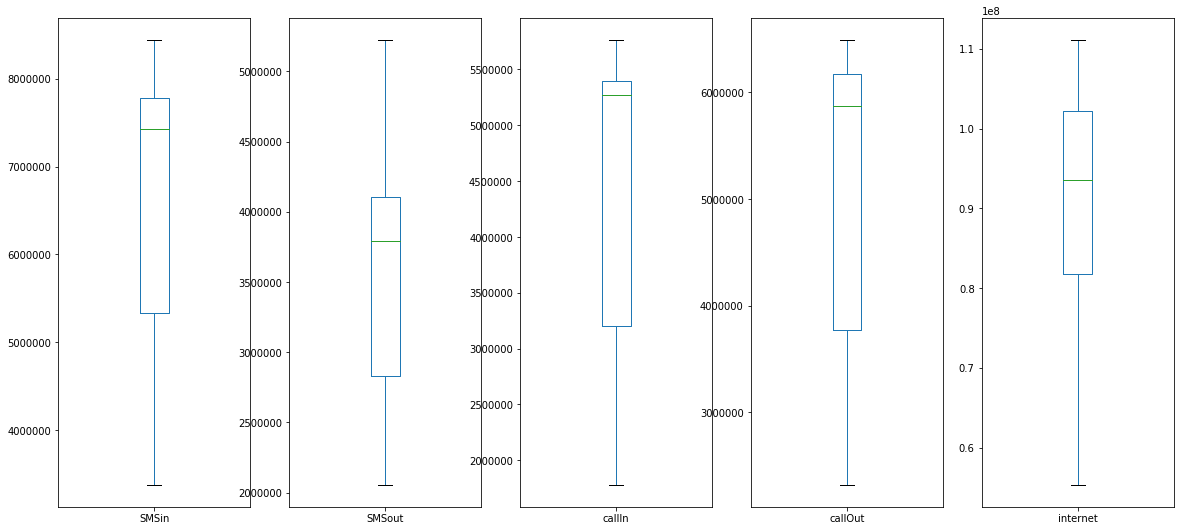

In [9]:
dfDaily.plot(kind='box',subplots=True, figsize=(20,9))

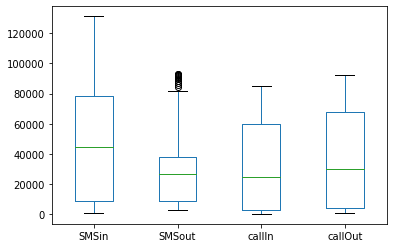

In [10]:
df[['SMSin','SMSout','callIn','callOut']].plot(kind='box')

In [11]:
dfDaily['SMSinShift'] = dfDaily['SMSin'].shift()

In [12]:
dfDaily['SMSinChange'] = dfDaily['SMSin']-dfDaily['SMSin'].shift()

C:\Users\kisha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


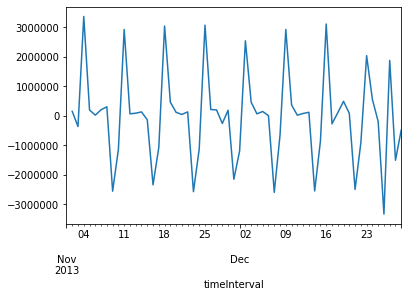

In [13]:
dfDaily['SMSinChange'].plot()

In [2]:
dfwCell = pd.read_csv(r'..\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\Daily-Consolidated-with-cellid.txt', delimiter= '\t')

In [15]:
dfwCell1 = dfwCell

In [16]:
dfwCell1['timeIntervalts'] = pd.to_datetime(dfwCell1['timeIntervalts'])
dfwCell1 = dfwCell1.set_index(['cellId','timeIntervalts'])

In [17]:
dfwCell1['SMSshifted'] = dfwCell1.groupby('cellId')['SMS'].shift()

In [18]:
dfwCell1['SMSchange'] = dfwCell1['SMS'] - dfwCell1['SMSshifted']
dfwCell1['SMSpctchange'] = dfwCell1.groupby('cellId')['SMS'].pct_change(fill_method ='ffill')

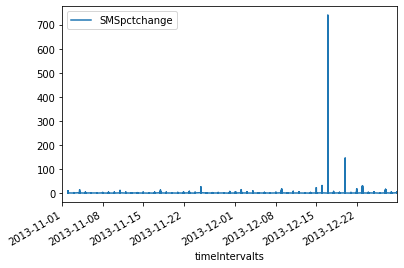

In [19]:
dfwCell1.reset_index().set_index(['timeIntervalts'])[['SMSpctchange']].plot()

In [20]:
dfwCell1

timeInterval       SMSin      SMSout  \
cellId timeIntervalts                                                       
1      2013-11-01 00:00:00+01:00  199195675200000   78.709755   45.886570   
       2013-11-02 00:00:00+01:00  199208116800000   86.415810   43.875946   
       2013-11-03 00:00:00+01:00  199220558400000   77.728292   45.446780   
       2013-11-04 00:00:00+01:00  199233000000000  104.793806   54.821018   
       2013-11-05 00:00:00+01:00  199245441600000   97.425105   46.607029   
...                                           ...         ...         ...   
10000  2013-12-25 00:00:00+01:00  199867521600000  348.998864  257.720372   
       2013-12-26 00:00:00+01:00  199879963200000  186.715274   92.548258   
       2013-12-27 00:00:00+01:00  199892404800000  233.239801   70.447072   
       2013-12-28 00:00:00+01:00  199904846400000  177.422546   71.416895   
       2013-12-29 00:00:00+01:00  199917288000000  130.030895   56.847904   

                                      callIn     callOut     internet  \
cellId timeIntervalts                                                   
1      2013-11-01 00:00:00+01:00   41.108567   48.245378  1507.048349   
       2013-11-02 00:00:00+01:00   47.891016   53.590637  1515.641856   
       2013-11-03 00:00:00+01:00   36.145436   40.906425  1533.148425   
       2013-11-04 00:00:00+01:00   67.898464   70.399418  1404.813593   
       2013-11-05 00:00:00+01:00   68.735213   70.766221  1518.090111   
...                                      ...         ...          ...   
10000  2013-12-25 00:00:00+01:00  126.329856  150.538393  2807.751360   
       2013-12-26 00:00:00+01:00   95.020923  105.056052  2587.112828   
       2013-12-27 00:00:00+01:00  142.720511  156.983690  2566.032999   
       2013-12-28 00:00:00+01:00  108.930903  131.882476  2373.501572   
       2013-12-29 00:00:00+01:00   83.989946   98.134224  2452.266242   

                                         SMS        call  SMSshifted  \
cellId timeIntervalts                                                  
1      2013-11-01 00:00:00+01:00  124.596325   89.353945         NaN   
       2013-11-02 00:00:00+01:00  130.291756  101.481653  124.596325   
       2013-11-03 00:00:00+01:00  123.175072   77.051861  130.291756   
       2013-11-04 00:00:00+01:00  159.614824  138.297882  123.175072   
       2013-11-05 00:00:00+01:00  144.032134  139.501434  159.614824   
...                                      ...         ...         ...   
10000  2013-12-25 00:00:00+01:00  606.719236  276.868249  446.061545   
       2013-12-26 00:00:00+01:00  279.263533  200.076975  606.719236   
       2013-12-27 00:00:00+01:00  303.686873  299.704201  279.263533   
       2013-12-28 00:00:00+01:00  248.839441  240.813379  303.686873   
       2013-12-29 00:00:00+01:00  186.878799  182.124170  248.839441   

                                   SMSchange  SMSpctchange  
cellId timeIntervalts                                       
1      2013-11-01 00:00:00+01:00         NaN           NaN  
       2013-11-02 00:00:00+01:00    5.695431      0.045711  
       2013-11-03 00:00:00+01:00   -7.116684     -0.054621  
       2013-11-04 00:00:00+01:00   36.439753      0.295837  
       2013-11-05 00:00:00+01:00  -15.582690     -0.097627  
...                                      ...           ...  
10000  2013-12-25 00:00:00+01:00  160.657691      0.360169  
       2013-12-26 00:00:00+01:00 -327.455703     -0.539715  
       2013-12-27 00:00:00+01:00   24.423340      0.087456  
       2013-12-28 00:00:00+01:00  -54.847432     -0.180605  
       2013-12-29 00:00:00+01:00  -61.960642     -0.248998  

[589939 rows x 11 columns]

In [21]:
timedf = dfwCell1[['SMSpctchange']].reset_index()

In [22]:
timedf["timeIntervalts"] = (timedf["timeIntervalts"].astype(int)// 10**9).astype('U10')
timedf.head()

,cellId,timeIntervalts,SMSpctchange
0,1,1383260400,NaN
1,1,1383346800,0.045711
2,1,1383433200,-0.054621
3,1,1383519600,0.295837
4,1,1383606000,-0.097627


In [23]:
timedf[timedf.SMSpctchange ==max(timedf.SMSpctchange)]

,cellId,timeIntervalts,SMSpctchange


In [24]:
max(timedf.SMSpctchange)

nan

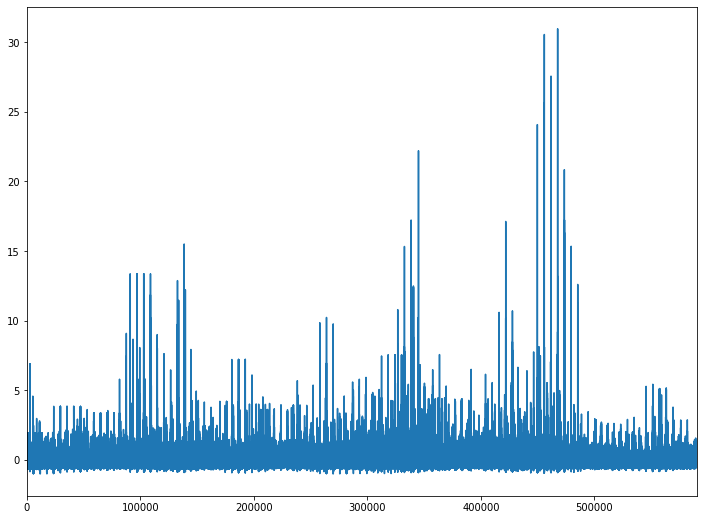

In [42]:
timedf['SMSpctchange'].plot(figsize=(12,9))

In [40]:
timedf[timedf['SMSpctchange']>40]

,cellId,timeIntervalts,SMSpctchange,COLORS
287553,4874,1387234800,94.117789,#0000ff


In [41]:
timedf.loc[287553,['SMSpctchange']] = 1

In [27]:
timedf = timedf.fillna(0)

In [43]:
%%time
data_to_color = "SMSpctchange"
cells = list(timedf["cellId"].unique())
dates = list(timedf["timeIntervalts"].unique())
colors = LocalFunctions.get_hex_colors(timedf, data_to_color, cmap = matplotlib.cm.bwr, log = True) # color dict that get's created from our get_hex_colors based on the values you want to plot
timedf["COLORS"] = timedf[data_to_color].map(colors) # create a colum in the df so that we can iterate and create the styledict

C:\Users\kisha\Anaconda3\lib\site-packages\matplotlib\colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
C:\Users\kisha\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Wall time: 5min 45s


In [44]:
styledict = {}
for cell in cells:
    #print(row)
    styledict[str(cell)] = {row['timeIntervalts']: {'color': row['COLORS'],
                                   'opacity': 0.8,'weight': 0.4,'fillOpacity': 0.8,'line_opacity':0.2,} 
                            for index, row in timedf[timedf['cellId']==cell].iterrows()}

In [45]:
len(styledict)

10000

In [46]:
gdf = gpd.read_file(r'..\Datasets Italia\milano-grid.geojson', mask='geojson')

In [ ]:
# creates and renders the Folium map
m = folium.Map(location=[45.46440063879739, 9.194880739442098],tiles="Stamen Toner" #"cartodbpositron"
               , zoom_start=12)

g = TimeSliderChoropleth(
    gdf.set_index("cellId").to_json(), # get's the coordinates for each id 
    styledict = styledict, # styledict contains for each id the timestamp and the color to plot.
    name = 'TimeSlider',
    overlay = False
)

m.add_child(g)
m.save('TimeSliderChoropleth-SMSpctchange.html')

m

In [3]:
dfwCell2 = dfwCell.copy()

In [4]:
dfwCell2 = dfwCell2[['cellId','SMS', 'call']]

In [5]:
dfwCell2 = dfwCell2.groupby('cellId').sum()

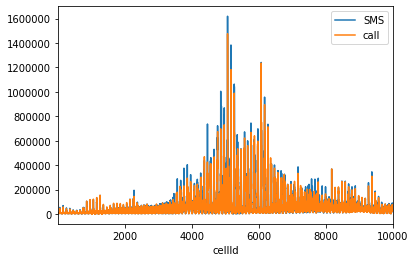

In [6]:
dfwCell2.plot()

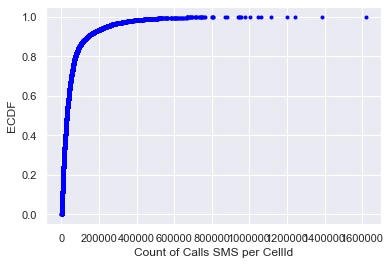

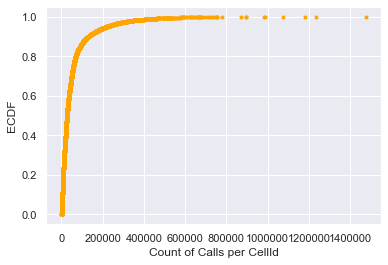

In [10]:
sns.set()
x,y = LocalFunctions.ecdf(dfwCell2['SMS'])
plt.plot(x, y, marker='.', linestyle = 'none',c='blue')
_ = plt.xlabel('Count of Calls SMS per CellId')
_ = plt.ylabel('ECDF')
plt.show()

x,y = LocalFunctions.ecdf(dfwCell2['call'])
plt.plot(x, y, marker='.', linestyle = 'none',c='orange')
plt.xlabel('Count of Calls per CellId')
plt.ylabel('ECDF')
plt.show()

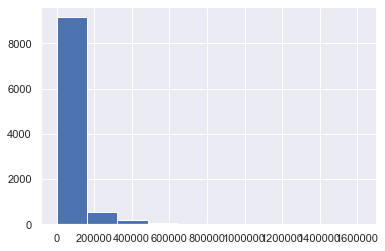

In [20]:
plt.hist(dfwCell2['SMS'])
plt.show()